# 02806 Social data analysis and visualization

## Assignment 1 

##### Libraries

Importing the libraries:

In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
import pdb
import json
import plotly.express as px
%matplotlib inline


In [10]:
# from IPython.core.display import display, HTML
# display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

### Part 1: Temporal Patterns

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).  

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [4]:
#Picking the filename to import into a pandas dataframe
fileName = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'

#Importing the dataset
filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'Datasets', fileName))
df = pd.read_csv(filePath)

#Removing the 2018 (since we don't have full data for 2018)
df['Year'] = pd.to_datetime(df['Date']).dt.to_period('Y')
df2 = df[df['Year'] != '2018'].copy() # drop rows corresponding to 2018

#For the exercise below, we look only at the following focus-crimes
focuscrimes = (set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))

> **Weekly patterns**. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

In [4]:
# Order the Day-of-Week column
df2['DayOfWeek'] = pd.Categorical(df2['DayOfWeek'],categories=[
                    'Monday','Tuesday','Wednesday','Thursday',
                    'Friday','Saturday','Sunday'],ordered=True)

focuscrimes_lst = [ 'WEAPON LAWS', 'DRUNKENNESS',
                    'TRESPASS','PROSTITUTION',
                    'DRIVING UNDER THE INFLUENCE','BURGLARY',
                    'ROBBERY','DRUG/NARCOTIC',
                    'LARCENY/THEFT','DISORDERLY CONDUCT',
                    'VANDALISM', 'VEHICLE THEFT',
                    'ASSAULT', 'STOLEN PROPERTY']

focuscrimes_lst.sort()

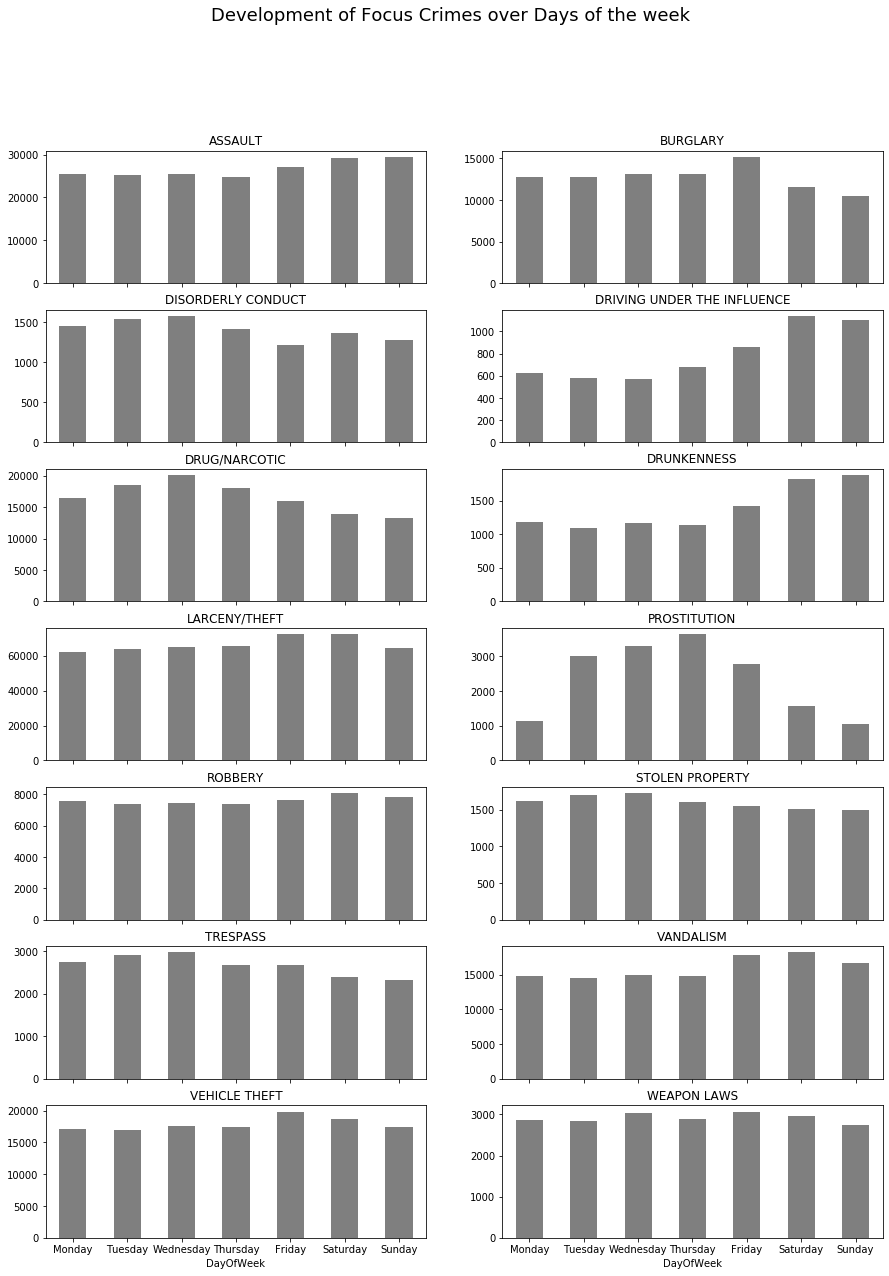

In [17]:
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Days of the week', fontsize=18)
group_count = df2.groupby(['Category','DayOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    group_count[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')

### Part 2: Thinking about data and visualization

### Part 3: Generating important plot types

### Part 4: A bit of geo-data

#### 4.1: Create a *Folium* map instance for the city of San Francisco and add a marker for the City Hall coordinates.

In [5]:
# Create New Map Instance
mapSF1 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 13)

# Add Marker for the City Hall to Map
folium.Marker([37.77919, -122.41914],
              popup='City Hall',
              icon=folium.Icon(color='blue',
                            icon='university',
                            prefix='fa')).add_to(mapSF1)

# Display Map
mapSF1

#### 4.2: Visualize selected crime incidents for a time period of interest.

In [6]:
#==============INPUT VARIABLES=====================
crime = 'DRUG/NARCOTIC'     # pick a crime category
start_date = '2015-06-01'   # format: yyyy-mm-dd
end_date = '2015-07-01'     # format: yyyy-mm-dd
#==================================================

# Create a filtered dataframe based on new preferences
df['Date'] = pd.to_datetime(df['Date'])
df2Map = df.loc[(df['Date'] >= start_date)
                &(df['Date'] <= end_date)
                &(df['Category']==crime)].copy()

# Create New Map instance
mapSF2 = folium.Map(
    location = [37.7749, -122.4194],
    tiles = 'Stamen Toner',
    zoom_start = 12)

# Add Makers to the map (based on preferences from above)
for i, row in df2Map.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=1,
                        popup=row['Date'].date(),
                        color='red').add_to(mapSF2)
mapSF2

### Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.